## Overview
This notebook is a step by step to calculate the degrees from semi-circular trajectory data

### Steps
1. grab the first point in the trajectory data 720 615 #(964, 480)
2. grab the last point in the trajectory data and loop through every trial
3. convert the origin 720 615 to (0,0) - which will give you an updated coordinate
4. using this updated coordinate, transfor it to polar coordinates, which will give you the degree of the data point


load data

- add subject number
- extract relevant columns
- concat data, axis 0
- average degree

### libraries

In [9]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import math

### cartesian to polar coordinates  

In [174]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)


# Cognitive

### load data and calculate polar coord

In [202]:
sublist = [ 95,96, 97, 99]
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-cognitive_meta_beh.csv'

df = pd.DataFrame()
result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + \
                    '_task-cognitive_meta_beh.csv'
    df = pd.read_csv(loadfilename, 
                     usecols=['image_filename','administer','match','p5_responseKey','cue_type','ptb_coord_x','ptb_coord_y'])
    df['sub_num'] = sub
    result = pd.concat([result, df], axis = 0, sort = True)

In [203]:
# step 3 - subtract mid point ________________________________________________________________________

result['new_ptb_coord_x'] = result['ptb_coord_x'] - 720
result['new_ptb_coord_y'] = abs(result['ptb_coord_y'] - 615)

result['r'], result['theta'] = cart2pol(result['new_ptb_coord_x'], result['new_ptb_coord_y'])

In [207]:
result

,administer,cue_type,image_filename,match,p5_responseKey,ptb_coord_x,ptb_coord_y,sub_num,new_ptb_coord_x,new_ptb_coord_y,r,theta
0,50,low,13_50_R.jpg,different,1,482.917969,556.742188,95,-237.082031,58.257812,244.134926,2.900638
1,150,low,13_150.jpg,same,2,509.277344,515.730469,95,-210.722656,99.269531,232.934492,2.701339
2,50,low,1_50_R.jpg,different,1,476.792969,580.289062,95,-243.207031,34.710938,245.671547,2.999828
3,150,high,25_150.jpg,same,2,518.460938,484.882812,95,-201.539062,130.117188,239.892635,2.568304
4,150,low,6_150_R.jpg,different,2,483.609375,538.406250,95,-236.390625,76.593750,248.489698,2.828253
5,50,high,34_50.jpg,same,2,457.996094,585.289062,95,-262.003906,29.710938,263.683118,3.028676
6,50,high,3_50.jpg,same,2,467.902344,595.285156,95,-252.097656,19.714844,252.867363,3.063548
7,50,high,11_50.jpg,same,2,469.359375,603.027344,95,-250.640625,11.972656,250.926418,3.093861
8,150,low,8_150_R.jpg,different,1,533.718750,461.355469,95,-186.281250,153.644531,241.469141,2.451912
9,100,low,8_100.jpg,same,2,465.414062,599.722656,95,-254.585938,15.277344,255.043912,3.081656


### REMOVE plot original attempt

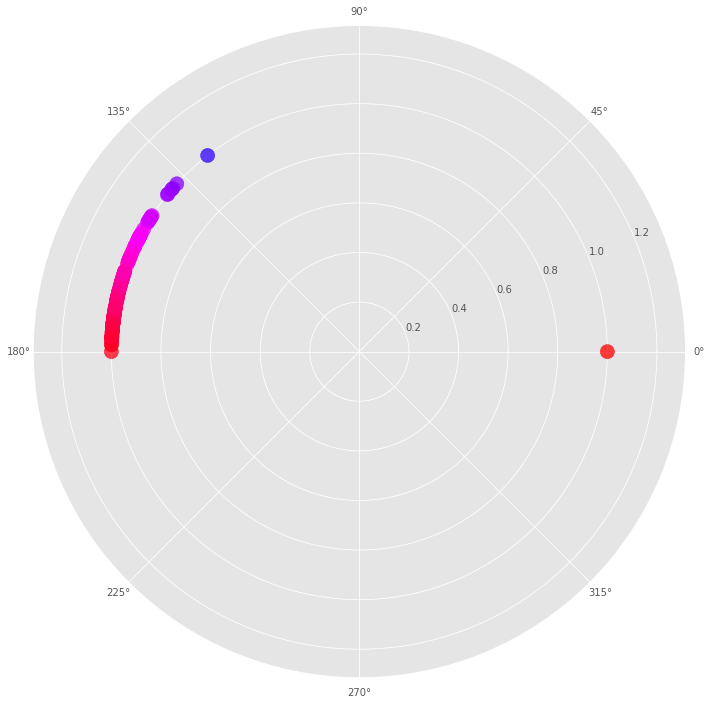

In [177]:
# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)
area = 200 * result['newr']**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(result['theta'], result['newr'], c=colors, s=area, cmap='hsv', alpha=0.75)

## cognitive - plot raw form

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale')

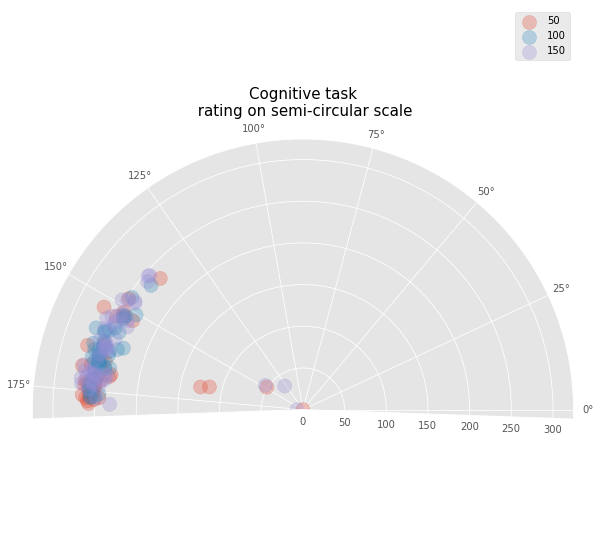

In [179]:

colors = result['theta']

# area = 200 * result['newr']**2
area = 200 * result['newr']**2

groups = result.groupby('administer')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(-2)
ax.set_thetamax(182)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Cognitive task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)
#  marker='o', linestyle='', ms=12,

## cognitive - plot by mental rotation degrees

Text(0.5, 0.8, 'Cognitive task\n rating on semi-circular scale per degree')

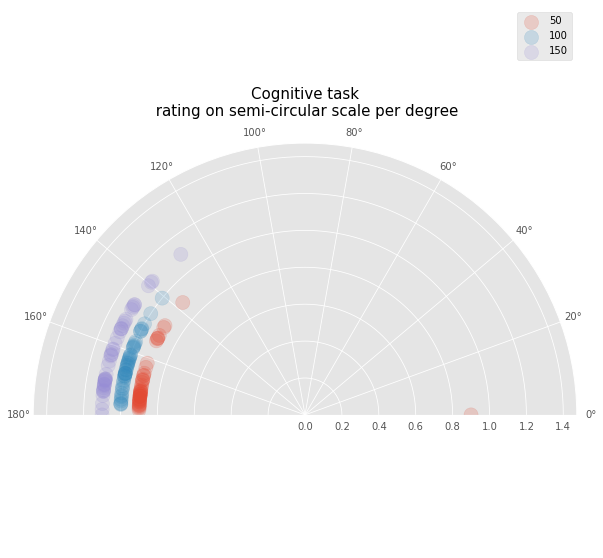

In [180]:

# Compute areas and colors

colors = result['theta']
result['newr'] = np.ones(result.r.shape)

area = 200 * result['newr']**2

# groups = result.groupby('administer')
group50 = result[result['administer'] ==50]
group100 = result[result['administer'] ==100]
group150 = result[result['administer'] ==150]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
p50 = ax.scatter(group50.theta, np.ones(group50.newr.shape)*0.9,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group100.theta, np.ones(group100.newr.shape),label=100, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group150.theta, np.ones(group150.newr.shape)*1.1,label=150, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
figure_title = "Cognitive task\n rating on semi-circular scale per degree"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)


## participant mean

In [433]:
group_mean = result.groupby(['administer','sub_num']).mean().reset_index()

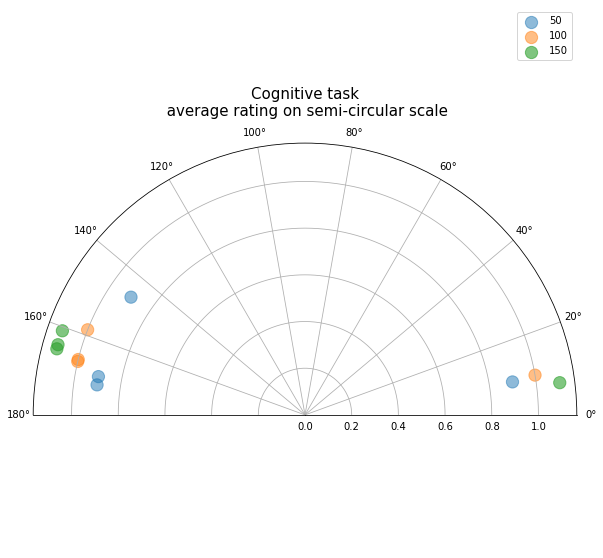

In [502]:


# Compute areas and colors

colors = group_mean['theta']
group_mean['newr'] = np.ones(group_mean.r.shape)
# area = 200 * result['newr']**2
area = 150 * group_mean['newr']**2


# groups = group_mean.groupby('administer')

group_mean_50 = group_mean[group_mean['administer'] ==50]
group_mean_100 = group_mean[group_mean['administer'] ==100]
group_mean_150 = group_mean[group_mean['administer'] ==150]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)
# for name, group in groups:
#     ax.scatter(group.theta, group.newr_random,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
# ax.legend()
#  marker='o', linestyle='', ms=12,
figure_title = "Cognitive task\n average rating on semi-circular scale"
plt.text(0.5,0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)


p50 = ax.scatter(group_mean_50.theta, np.ones(group_mean_50.newr.shape)*0.9,label=50, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p100 = ax.scatter(group_mean_100.theta, np.ones(group_mean_100.newr.shape),label=100, alpha=0.50, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p150 = ax.scatter(group_mean_150.theta, np.ones(group_mean_150.newr.shape)*1.1,label=150, alpha=0.60, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

## RT

In [182]:
sublist = [ 95,96, 97, 99]
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-cognitive_meta_beh.csv'

df = pd.DataFrame()
result = pd.DataFrame()

for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + \
                    '_task-cognitive_meta_beh.csv'
    df = pd.read_csv(loadfilename, 
                     usecols=['image_filename','administer','match','p5_responseKey','p6_decisionRT','cue_type','ptb_coord_x','ptb_coord_y'])
    df['sub_num'] = sub
    result = pd.concat([result, df], axis = 0, sort = True)

In [183]:
group_mean = result.groupby(['administer','sub_num']).mean().reset_index()

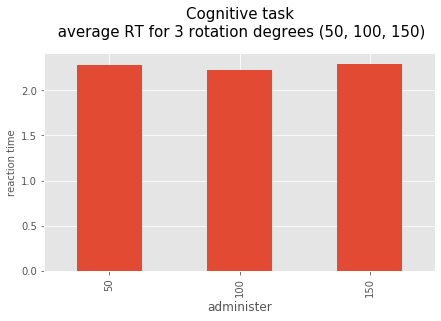

In [184]:
fig, ax = plt.subplots(figsize=(7,4))
figure_title = "Cognitive task\n average RT for 3 rotation degrees (50, 100, 150)"
plt.text(0.5, 1.08, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)
plt.ylabel('reaction time', size = 10)
group_mean.groupby(['administer']).mean()['p6_decisionRT'].plot.bar(ax = ax) #(x = 'administer', y = 'p6_decisionRT', rot = 0)

# PAIN

In [79]:
sublist = [95, 96, 97]
# FIRST IMPORT (CREATE RESULT DATA FRAME)
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-pain_meta_beh.csv'

pain_result = pd.DataFrame()
# pain_result = pd.read_csv(metafilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
# pain_result['sub_num'] = 95



for ind,sub in enumerate(sublist):
    loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-pain_meta_beh.csv'
    df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
    df['sub_num'] = sub
    pain_result = pd.concat([pain_result, df], axis = 0, sort = True)

    # step 3
pain_result['new_ptb_coord_x'] = pain_result['ptb_coord_x'] - 720
pain_result['new_ptb_coord_y'] = abs(pain_result['ptb_coord_y'] - 615)



In [80]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

r, theta= cart2pol(pain_result['new_ptb_coord_x'],pain_result['new_ptb_coord_y'])

pain_result['theta'] = theta
pain_result['r'] = r

## pain raw form

Text(0.5, 0.8, 'Pain - raw form rating')

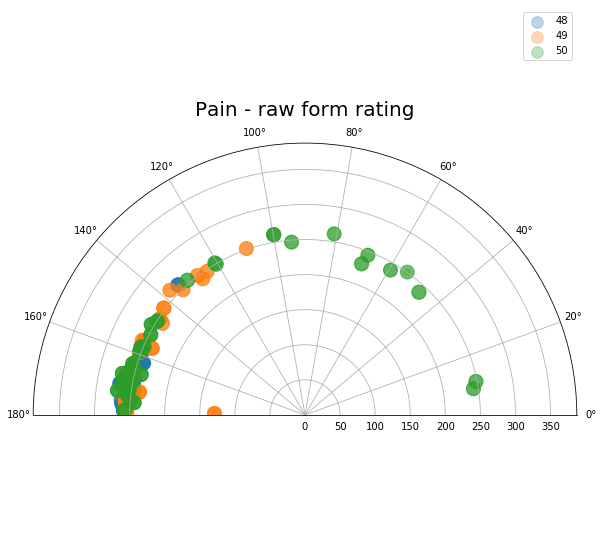

In [513]:
colors = pain_result['theta']
area = 0.003 * pain_result['r']**2
groups = pain_result.groupby('administer')
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ax.legend()

figure_title = "Pain - raw form rating"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)

## nonraw form

Text(0.5, 0.8, 'Pain - rating on semi-circle')

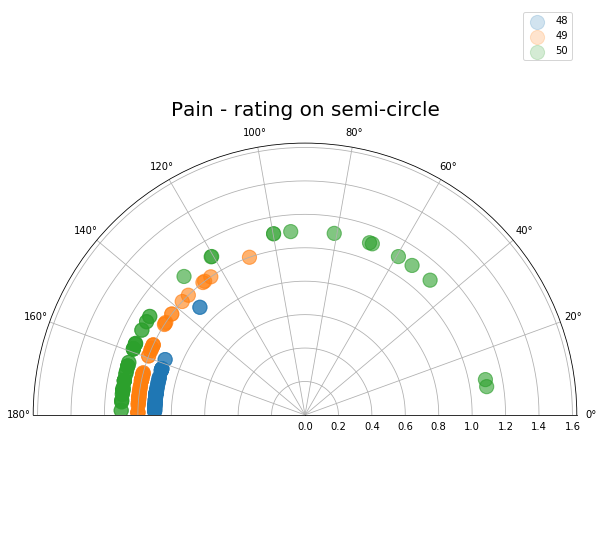

In [514]:

# Compute areas and colors

colors = pain_result['theta']
pain_result['newr'] = np.ones(pain_result.r.shape)

area = 200 * pain_result['newr']**2

# groups = result.groupby('administer')
group48 = pain_result[pain_result['administer'] ==48]
group49 = pain_result[pain_result['administer'] ==49]
group50 = pain_result[pain_result['administer'] ==50]

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

# for name, group in groups:
#     ax.scatter(group.theta, np.ones(group.newr_random.shape),label=name, alpha=0.10, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p48 = ax.scatter(group48.theta, np.ones(group48.newr.shape)*0.9,label=48, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p49 = ax.scatter(group49.theta, np.ones(group49.newr.shape),label=49, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
p50 = ax.scatter(group50.theta, np.ones(group50.newr.shape)*1.1,label=50, alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

figure_title = "Pain - rating on semi-circle"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)

# VICARIOUS

### load data

In [185]:
sublist = [96, 97,99]
v_result = pd.DataFrame()
# FIRST IMPORT (CREATE RESULT DATA FRAME)
main_dir = '/Users/h/Documents/projects_local/social_influence'
metafilename = main_dir + '/data/sub-095/metadata' + os.sep + 'sub-095_task-vicarious_meta_beh.csv'

for ind,sub in enumerate(sublist):
    for ver in range(1,3):
        loadfilename =  main_dir + '/data/sub-0' + str(sub) + '/metadata' + os.sep + 'sub-0' + str(sub) + '_task-vicarious_' + str(ver) + '_meta_beh.csv'
        df = pd.read_csv(loadfilename, usecols=['administer','ptb_coord_x','ptb_coord_y', 'p6_decisionRT'])
        df['sub_num'] = sub
        v_result = pd.concat([v_result, df], axis = 0, sort = False)

    # step 3
v_result['new_ptb_coord_x'] = v_result['ptb_coord_x'] - 720
v_result['new_ptb_coord_y'] = abs(v_result['ptb_coord_y'] - 615)



## vicarious - plot raw rating 

Text(0.5, 0.8, 'Vicarious task\n rating on semi-circular scale')

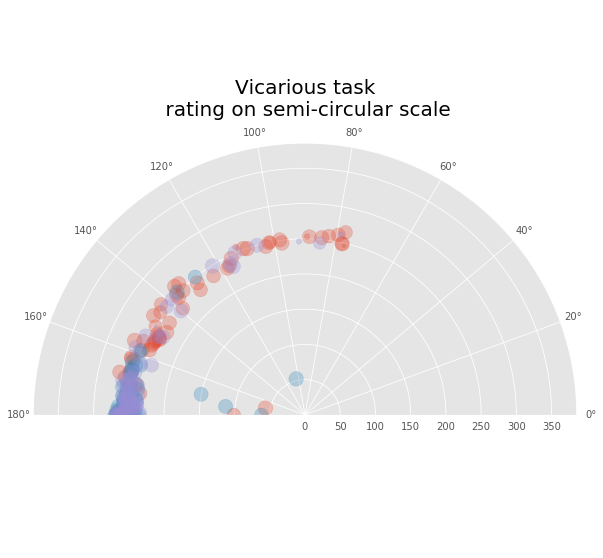

In [186]:
v_result['r'], v_result['theta'] = cart2pol(v_result['new_ptb_coord_x'], v_result['new_ptb_coord_y'])

colors = v_result['theta']
area = 0.003 * v_result['r']**2
# area = 0.004 * v_result['newr_random']**2

groups = v_result.groupby('administer')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

for name, group in groups:
    ax.scatter(group.theta, group.r,label=name, alpha=0.30, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 

figure_title = "Vicarious task\n rating on semi-circular scale"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=20,
         transform = ax.transAxes)
#  marker='o', linestyle='', ms=12,

## vicarious - plot by video levels high/med/low

Text(0.5, 0.8, 'vicarious pain - rating on semi-circle')

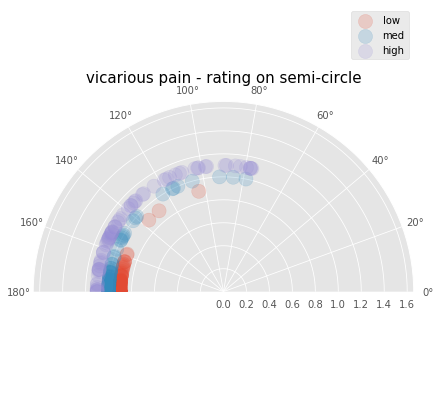

In [194]:

# Compute areas and colors

colors = v_result['theta']
v_result['newr'] = np.ones(v_result.r.shape)

area = 200 * v_result['newr']**2

# groups = result.groupby('administer')
groupl = v_result[v_result['administer'] =='low']
groupm = v_result[v_result['administer'] =='med']
grouph = v_result[v_result['administer'] =='high']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(180)

# for name, group in groups:
#     ax.scatter(group.theta, np.ones(group.newr_random.shape),label=name, alpha=0.10, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
pl = ax.scatter(groupl.theta, np.ones(groupl.newr.shape)*0.9,label='low', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
pm = ax.scatter(groupm.theta, np.ones(groupm.newr.shape),label='med', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
ph = ax.scatter(grouph.theta, np.ones(grouph.newr.shape)*1.1,label='high', alpha=0.20, s=area, marker='o',cmap='hsv') # c=colors, s=area, cmap='hsv', 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

figure_title = "vicarious pain - rating on semi-circle"
plt.text(0.5, 0.8, figure_title,
         horizontalalignment='center',
         fontsize=15,
         transform = ax.transAxes)

# fitting beta distribution

## fit pain data

/Users/h/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'pain 50C')

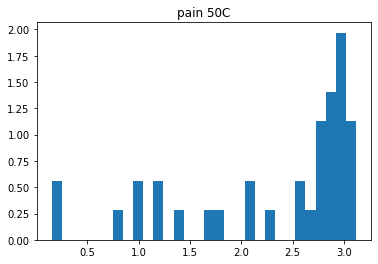

In [145]:
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.special import gamma as gammaf
import matplotlib.pyplot as plt
import sys

data = pain_result['theta'][pain_result['administer'] == 50 ] 
plt.hist(data,bins=30,normed=True)
fitted=lambda x,a,b:gammaf(a+b)/gammaf(a)/gammaf(b)*x**(a-1)*(1-x)**(b-1) #pdf of beta

xx=np.linspace(0,max(data),len(data))
ab,bb,cb,db = beta.fit(data)  

pdf_beta = stats.beta.pdf(xx, ab, bb,cb, db) 
# plt.plot(xx, pdf_beta, label="Beta")
# plt.xlim(0,3.5)
plt.title("pain 50C")

/Users/h/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'pain 49C')

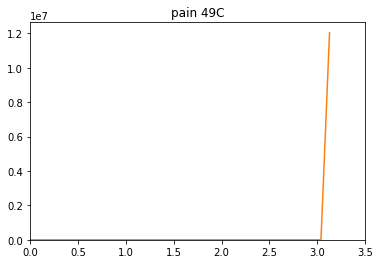

In [100]:
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.special import gamma as gammaf
import matplotlib.pyplot as plt
import sys

data = pain_result['theta'][pain_result['administer'] == 49 ] 
plt.hist(data,bins=30,normed=True)
fitted=lambda x,a,b:gammaf(a+b)/gammaf(a)/gammaf(b)*x**(a-1)*(1-x)**(b-1) #pdf of beta

xx=np.linspace(0,max(data),len(data))
ab,bb,cb,db = beta.fit(data)  
# pdf_beta = stats.beta.pdf( ab, bb,cb, db)  
# alpha3,beta3,xx,yy=beta.fit(data)
pdf_beta = stats.beta.pdf(xx, ab, bb,cb, db) 
plt.plot(xx, pdf_beta, label="Beta")
plt.xlim(0,3.5)
plt.title("pain 49C")

/Users/h/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'pain 48C')

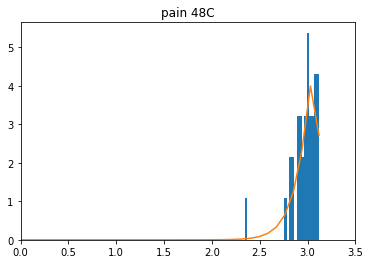

In [116]:
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.special import gamma as gammaf
import matplotlib.pyplot as plt
import sys

data = pain_result['theta'][pain_result['administer'] == 48 ] 
plt.hist(data,bins=30,normed=True)
fitted=lambda x,a,b:gammaf(a+b)/gammaf(a)/gammaf(b)*x**(a-1)*(1-x)**(b-1) #pdf of beta

xx=np.linspace(0,max(data),len(data))
ab,bb,cb,db = beta.fit(data)  

pdf_beta = stats.beta.pdf(xx, ab, bb,cb, db) 
plt.plot(xx, pdf_beta, label="Beta")
plt.xlim(0,3.5)
plt.title("pain 48C")

/Users/h/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([0.18675151, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.09337576, 0.        , 0.18675151, 0.        ,
        0.18675151, 0.        , 0.09337576, 0.        , 0.        ,
        0.09337576, 0.09337576, 0.09337576, 0.        , 0.18675151,
        0.28012727, 0.09337576, 0.28012727, 0.09337576, 0.46687878,
        0.37350302, 0.8403818 , 1.58738784, 2.61452115, 2.24101813]),
 array([0.15434949, 0.25351077, 0.35267204, 0.45183332, 0.5509946 ,
        0.65015588, 0.74931716, 0.84847843, 0.94763971, 1.04680099,
        1.14596227, 1.24512355, 1.34428482, 1.4434461 , 1.54260738,
        1.64176866, 1.74092994, 1.84009121, 1.93925249, 2.03841377,
        2.13757505, 2.23673633, 2.33589761, 2.43505888, 2.53422016,
        2.63338144, 2.73254272, 2.831704  , 2.93086527, 3.03002655,
        3.12918783]),
 <a list of 30 Patch objects>)

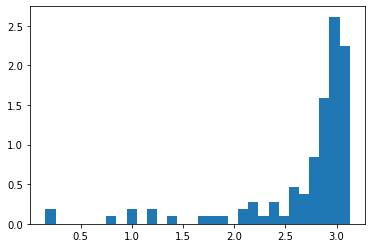

In [111]:
plt.hist(pain_result['theta'],bins=30,normed=True)

/Users/h/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


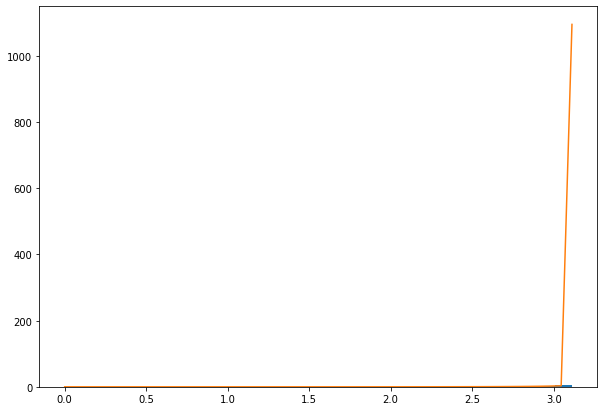

In [153]:
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.special import gamma as gammaf
import matplotlib.pyplot as plt
import sys

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()

def beta_fit_plot(d):
    xx = np.linspace(0,max(d),len(d))
    ab,bb,cb,db = beta.fit(d)  
    pdf_beta = stats.beta.pdf(xx, ab, bb,cb, db) 
    return xx, pdf_beta
    
group48 = result['theta'][result['administer'] == 50 ] 
group49 = result['theta'][result['administer'] == 49 ] 
group50 = result['theta'][result['administer'] == 38 ] 

x, beta = beta_fit_plot(group48)

plt.hist(group48,bins=30,normed=True)
plt.plot(x, beta, label="Beta")

## function - best fit distribution

useful: https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

In [158]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

## best fit - cognitive

/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

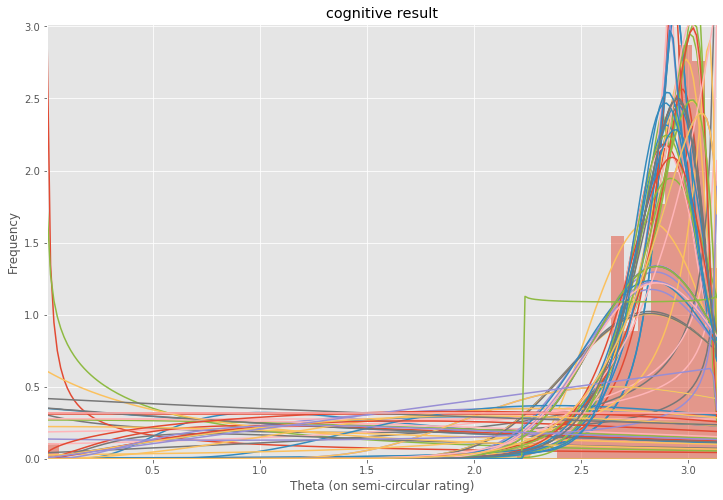

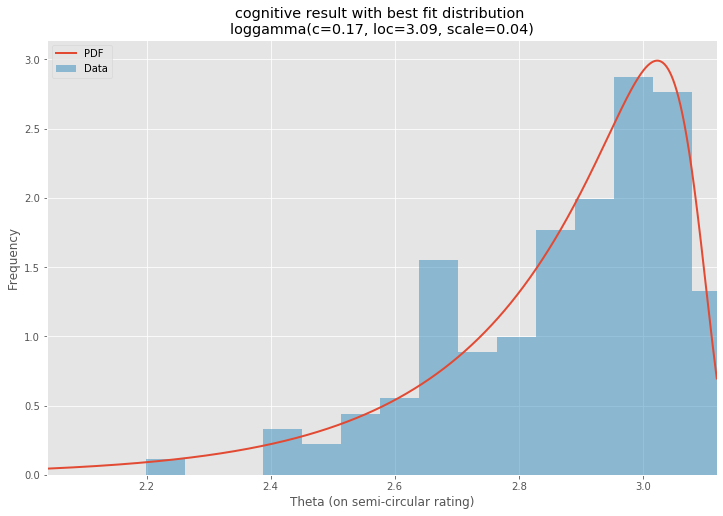

In [170]:
# Plot for comparison
plt.figure(figsize=(12,8))

data = result['theta']
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'cognitive result')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'cognitive result with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

## best fit - pain

/Users/h/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1344: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


Text(0, 0.5, 'Frequency')

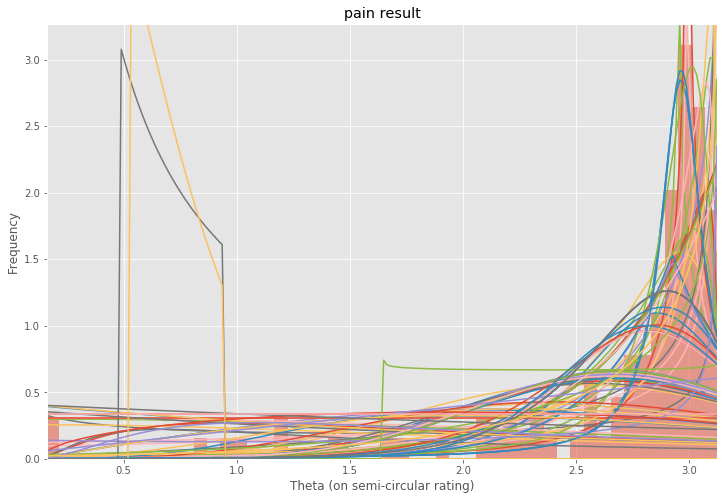

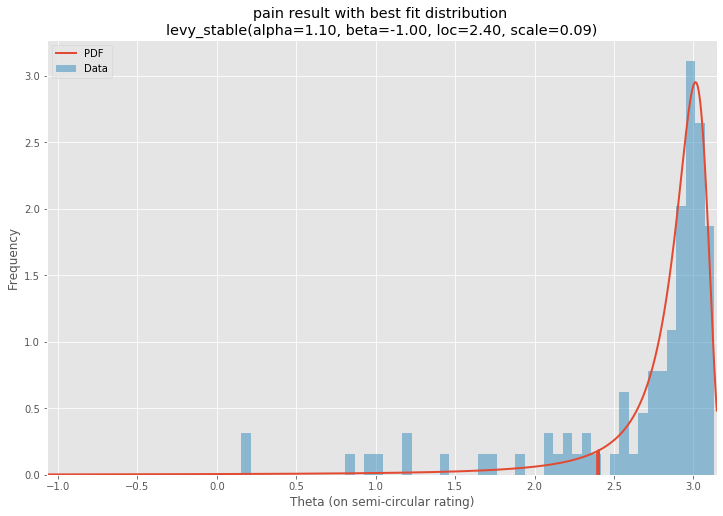

In [171]:
# Plot for comparison
plt.figure(figsize=(12,8))

data = pain_result['theta']
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5) #, color=plt.rcParams['axes.color_cycle'][1]
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'pain result')
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'pain result with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Theta (on semi-circular rating)')
ax.set_ylabel('Frequency')